In the real estate market, accurately predicting the price of a house is crucial for both buyers and sellers to make informed decisions. However, the process is often complex due to the multitude of factors that can influence a house's price, such as its size, location, age, and amenities. Traditional methods of price estimation can be time-consuming and may not always capture the nuanced interactions between these factors.

Using machine learning methods develop a model to predict the price of houses given a data with 5000 records including the area, number of bedrooms, bathrooms, garage, age, etc

I was able to achieve lesser error with XGBOOST but not with other algorithms I tried please point out my errors

In [1]:
#importing necessary libaries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#import data
df = pd.read_csv('house_prices_dirty.csv')

In [3]:
# price is the target

In [4]:
#first 5 rows
df.head()

,Area,Bedrooms,Bathrooms,Location,Age,Garage,Price
0,3774,4,2,Location3,23.0,0,814142.617200
1,4107,2,2,Location3,46.0,0,836259.082065
2,1460,3,3,Location2,113.0,1,296721.573960
3,1894,5,2,NaN,30.0,0,399099.591046
4,1730,3,2,Location5,67.0,0,441862.941002


### EDA

In [5]:
#columns in the dataframe
df.columns

Index(['Area', 'Bedrooms', 'Bathrooms', 'Location', 'Age', 'Garage', 'Price'], dtype='object')

In [6]:
# new_name = []
# for x in df.columns:
#     new_name.append(x.lower())

In [7]:
# new_name

In [8]:
# list comprehension
[x.lower() for x in df.columns]

['area', 'bedrooms', 'bathrooms', 'location', 'age', 'garage', 'price']

In [9]:
# changing column names to small letters
df.columns = [x.lower() for x in df.columns]

In [10]:
df.columns

Index(['area', 'bedrooms', 'bathrooms', 'location', 'age', 'garage', 'price'], dtype='object')

In [11]:
#top 5 rows
df.head()

,area,bedrooms,bathrooms,location,age,garage,price
0,3774,4,2,Location3,23.0,0,814142.617200
1,4107,2,2,Location3,46.0,0,836259.082065
2,1460,3,3,Location2,113.0,1,296721.573960
3,1894,5,2,NaN,30.0,0,399099.591046
4,1730,3,2,Location5,67.0,0,441862.941002


In [12]:
#short description
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   area       5000 non-null   int64  
 1   bedrooms   5000 non-null   int64  
 2   bathrooms  5000 non-null   int64  
 3   location   4969 non-null   object 
 4   age        4907 non-null   float64
 5   garage     5000 non-null   int64  
 6   price      5000 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 273.6+ KB


In [13]:
#a simple statistical description
df.describe()

,area,bedrooms,bathrooms,age,garage,price
count,5000.000000,5000.0000,5000.000000,4907.000000,5000.000000,5.000000e+03
mean,2567.655200,2.9982,1.976600,60.129407,1.008800,5.573903e+05
std,1120.887667,1.4140,0.819382,34.313983,0.819547,2.211179e+05
min,600.000000,1.0000,1.000000,1.000000,0.000000,4.047702e+04
25%,1592.750000,2.0000,1.000000,30.000000,0.000000,3.783680e+05
50%,2561.500000,3.0000,2.000000,60.000000,1.000000,5.477114e+05
75%,3550.250000,4.0000,3.000000,89.000000,2.000000,7.254004e+05
max,4499.000000,5.0000,3.000000,119.000000,2.000000,1.192210e+06


In [14]:
#a simple statistical description for the Categorical column
# 'O' - letter represents object
df.describe(include='O')

,location
count,4969
unique,5
top,Location2
freq,1051


In [15]:
#checking for missing values
df.isnull()

,area,bedrooms,bathrooms,location,age,garage,price
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
4995,False,False,False,False,False,False,False
4996,False,False,False,False,False,False,False
4997,False,False,False,False,False,False,False
4998,False,False,False,False,False,False,False


In [16]:
#showing that False represents 0 in Python
False ==  0

True

In [17]:
# checking if there is missing value
df.isnull().sum()

area          0
bedrooms      0
bathrooms     0
location     31
age          93
garage        0
price         0
dtype: int64

There are missing values in the data specifically for Location and Age

### Dealing with missing values

In [18]:
#either of these are the same

# df['location']
# df.location

In [19]:
#showing counts of location categories
df.location.value_counts()

location
Location2    1051
Location4     985
Location1     985
Location5     984
Location3     964
Name: count, dtype: int64

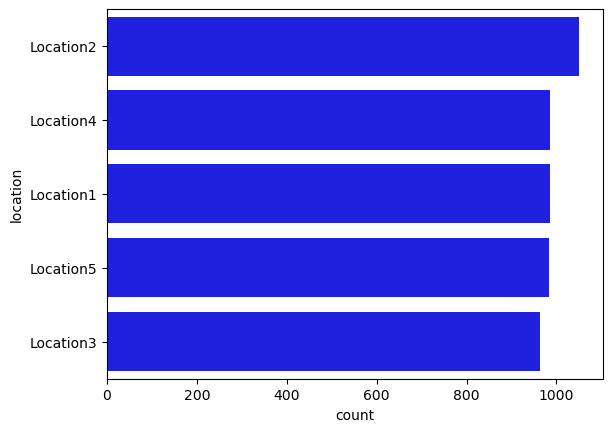

In [20]:
#count of all the location where the data was gotten from
sns.countplot(y=df.location, color='blue', order = df.location.value_counts().keys());

We will fill Location with the mode which is location2

In [21]:
#getting the most occuring location
df.location.mode()[0]

'Location2'

In [22]:
type(df.location.mode())

pandas.core.series.Series

In [23]:
#getting the mode
most_location = df.location.mode()[0]

In [24]:
#either of the code works

# df.location.fillna(most_location, inplace=True)
df.location = df.location.fillna(most_location)

In [25]:
df.isnull().sum()

area          0
bedrooms      0
bathrooms     0
location      0
age          93
garage        0
price         0
dtype: int64

#### for age

In [26]:
df.age.value_counts()

age
111.0    59
54.0     55
112.0    54
36.0     52
81.0     52
         ..
82.0     32
117.0    32
113.0    31
93.0     30
27.0     27
Name: count, Length: 119, dtype: int64

In [27]:
# getting mean values and converting it to integer
int(df.age.mean())

60

In [28]:
age_mean = int(df.age.mean())

In [29]:
#filling the missing values with mean
df.age = df.age.fillna(age_mean)

In [30]:
df.isna().sum()

area         0
bedrooms     0
bathrooms    0
location     0
age          0
garage       0
price        0
dtype: int64

#### Univariate Analysis

In [31]:
df.bedrooms.value_counts()

bedrooms
2    1039
5    1008
1     985
4     984
3     984
Name: count, dtype: int64

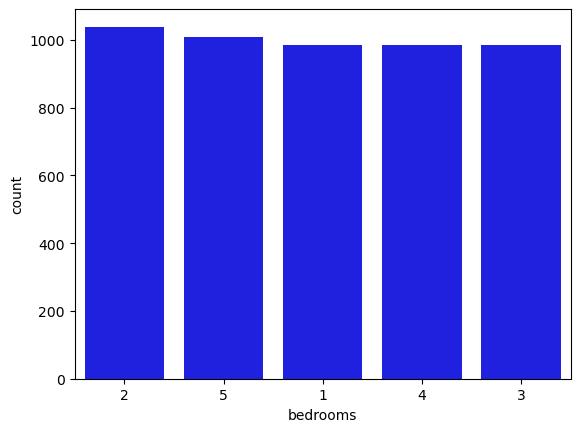

In [32]:
#count of all the number of bedrooms in descending order
sns.countplot(x=df.bedrooms, color='blue', order = df.bedrooms.value_counts().keys() );

In [33]:
df.head()

,area,bedrooms,bathrooms,location,age,garage,price
0,3774,4,2,Location3,23.0,0,814142.617200
1,4107,2,2,Location3,46.0,0,836259.082065
2,1460,3,3,Location2,113.0,1,296721.573960
3,1894,5,2,Location2,30.0,0,399099.591046
4,1730,3,2,Location5,67.0,0,441862.941002


C:\Users\incase\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


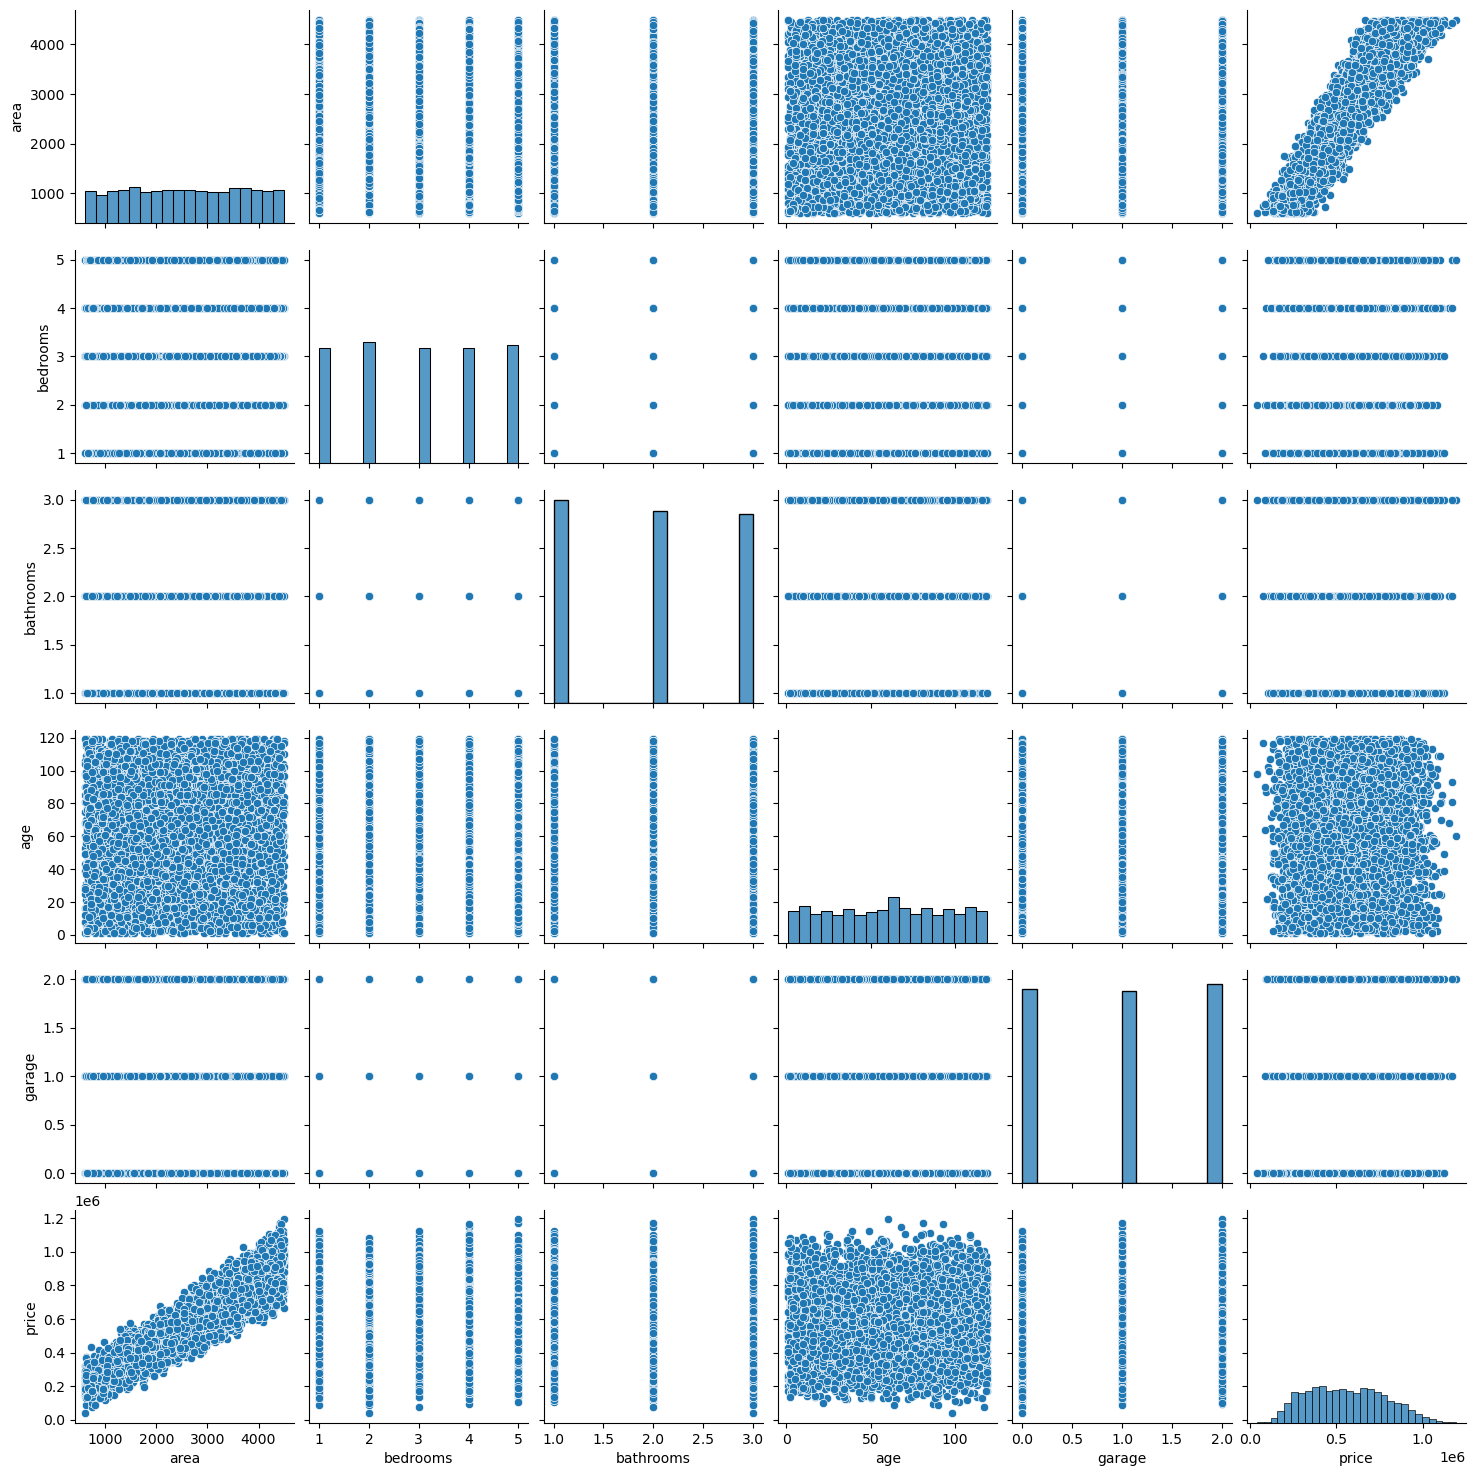

In [34]:
# a quick plot comparing columns
sns.pairplot(df, kind='scatter')
plt.show()

In [35]:
# check for all houses that are more than 119 years

In [36]:
# checking the correlations between features
df.drop('location', axis=1).corr()

,area,bedrooms,bathrooms,age,garage,price
area,1.000000,-0.002732,-0.009464,0.017319,-0.013903,0.919300
bedrooms,-0.002732,1.000000,-0.007115,0.005864,-0.006719,0.035857
bathrooms,-0.009464,-0.007115,1.000000,0.014557,-0.000587,0.024903
age,0.017319,0.005864,0.014557,1.000000,-0.007465,-0.001968
garage,-0.013903,-0.006719,-0.000587,-0.007465,1.000000,0.027198
price,0.919300,0.035857,0.024903,-0.001968,0.027198,1.000000


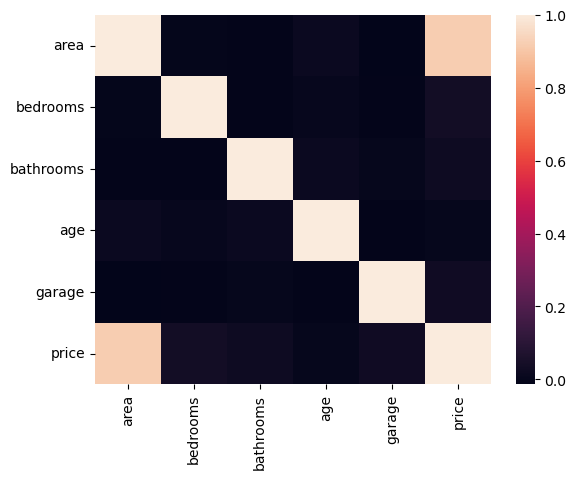

In [37]:
#you can also try this
sns.heatmap(df.drop('location', axis=1).corr());

In [38]:
df.drop('location', axis=1).corr()

,area,bedrooms,bathrooms,age,garage,price
area,1.000000,-0.002732,-0.009464,0.017319,-0.013903,0.919300
bedrooms,-0.002732,1.000000,-0.007115,0.005864,-0.006719,0.035857
bathrooms,-0.009464,-0.007115,1.000000,0.014557,-0.000587,0.024903
age,0.017319,0.005864,0.014557,1.000000,-0.007465,-0.001968
garage,-0.013903,-0.006719,-0.000587,-0.007465,1.000000,0.027198
price,0.919300,0.035857,0.024903,-0.001968,0.027198,1.000000


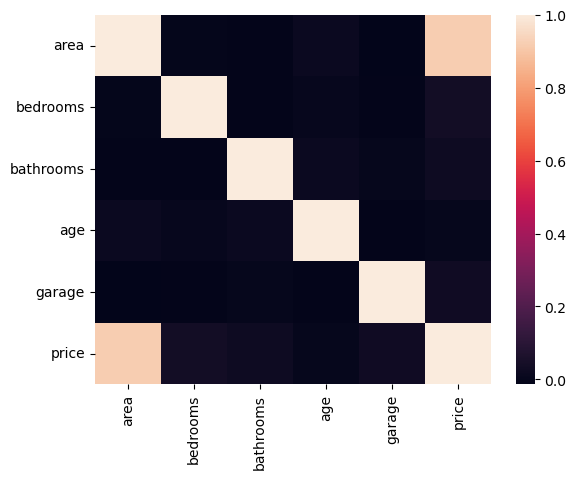

In [39]:
sns.heatmap(df.drop('location', axis=1).corr());

### Feature Engineering

In [40]:
df.head()

,area,bedrooms,bathrooms,location,age,garage,price
0,3774,4,2,Location3,23.0,0,814142.617200
1,4107,2,2,Location3,46.0,0,836259.082065
2,1460,3,3,Location2,113.0,1,296721.573960
3,1894,5,2,Location2,30.0,0,399099.591046
4,1730,3,2,Location5,67.0,0,441862.941002


In [41]:
# adding the rooms
df['rooms'] = df['bedrooms'] + df['bathrooms']

In [42]:
df.head()

,area,bedrooms,bathrooms,location,age,garage,price,rooms
0,3774,4,2,Location3,23.0,0,814142.617200,6
1,4107,2,2,Location3,46.0,0,836259.082065,4
2,1460,3,3,Location2,113.0,1,296721.573960,6
3,1894,5,2,Location2,30.0,0,399099.591046,7
4,1730,3,2,Location5,67.0,0,441862.941002,5


In [43]:
#generating new features
#average room per area
df['average_room_area'] = df['area'] / df['bedrooms']
df['mean_rooms_per_area'] = df['area'] / df['rooms']
df['ratio_bathrooms_bedrooms'] = df['bathrooms'] / df['bedrooms']

In [44]:
df.head()

,area,bedrooms,bathrooms,location,age,garage,price,rooms,average_room_area,mean_rooms_per_area,ratio_bathrooms_bedrooms
0,3774,4,2,Location3,23.0,0,814142.617200,6,943.500000,629.000000,0.500000
1,4107,2,2,Location3,46.0,0,836259.082065,4,2053.500000,1026.750000,1.000000
2,1460,3,3,Location2,113.0,1,296721.573960,6,486.666667,243.333333,1.000000
3,1894,5,2,Location2,30.0,0,399099.591046,7,378.800000,270.571429,0.400000
4,1730,3,2,Location5,67.0,0,441862.941002,5,576.666667,346.000000,0.666667


In [45]:
#this returns only the unique values in location
df.location.unique()

array(['Location3', 'Location2', 'Location5', 'Location4', 'Location1'],
      dtype=object)

In [46]:
location_dic = {'Location3':1, 'Location2':2, 'Location5':3, 'Location4':4, 'Location1':5}

In [47]:
#encoding
df['location_new'] = df.location.replace(location_dic)

In [48]:
df.head()

,area,bedrooms,bathrooms,location,age,garage,price,rooms,average_room_area,mean_rooms_per_area,ratio_bathrooms_bedrooms,location_new
0,3774,4,2,Location3,23.0,0,814142.617200,6,943.500000,629.000000,0.500000,1
1,4107,2,2,Location3,46.0,0,836259.082065,4,2053.500000,1026.750000,1.000000,1
2,1460,3,3,Location2,113.0,1,296721.573960,6,486.666667,243.333333,1.000000,2
3,1894,5,2,Location2,30.0,0,399099.591046,7,378.800000,270.571429,0.400000,2
4,1730,3,2,Location5,67.0,0,441862.941002,5,576.666667,346.000000,0.666667,3


In [49]:
#another way to encode

In [50]:
#this is to reverse location
location_dic_rev = {1:'Location3', 2:'Location2', 3:'Location5', 4:'Location4', 5:'Location1'}
df.location = df.location.replace(location_dic_rev)

In [51]:
df.head()

,area,bedrooms,bathrooms,location,age,garage,price,rooms,average_room_area,mean_rooms_per_area,ratio_bathrooms_bedrooms,location_new
0,3774,4,2,Location3,23.0,0,814142.617200,6,943.500000,629.000000,0.500000,1
1,4107,2,2,Location3,46.0,0,836259.082065,4,2053.500000,1026.750000,1.000000,1
2,1460,3,3,Location2,113.0,1,296721.573960,6,486.666667,243.333333,1.000000,2
3,1894,5,2,Location2,30.0,0,399099.591046,7,378.800000,270.571429,0.400000,2
4,1730,3,2,Location5,67.0,0,441862.941002,5,576.666667,346.000000,0.666667,3


In [52]:
#one-hot-encoding
# so you might be getting a True and False so just use the second line

pd.get_dummies(df.location)
# pd.get_dummies(df.location, dtype=int)

,Location1,Location2,Location3,Location4,Location5
0,False,False,True,False,False
1,False,False,True,False,False
2,False,True,False,False,False
3,False,True,False,False,False
4,False,False,False,False,True
...,...,...,...,...,...
4995,False,False,True,False,False
4996,False,False,False,True,False
4997,False,True,False,False,False
4998,False,False,False,False,True


In [53]:
#just storing the dummies to a variable
location_dummies = pd.get_dummies(df.location)

In [54]:
new_df = pd.concat([df, location_dummies], axis=1)

In [55]:
new_df.head()

,area,bedrooms,bathrooms,location,age,garage,price,rooms,average_room_area,mean_rooms_per_area,ratio_bathrooms_bedrooms,location_new,Location1,Location2,Location3,Location4,Location5
0,3774,4,2,Location3,23.0,0,814142.617200,6,943.500000,629.000000,0.500000,1,False,False,True,False,False
1,4107,2,2,Location3,46.0,0,836259.082065,4,2053.500000,1026.750000,1.000000,1,False,False,True,False,False
2,1460,3,3,Location2,113.0,1,296721.573960,6,486.666667,243.333333,1.000000,2,False,True,False,False,False
3,1894,5,2,Location2,30.0,0,399099.591046,7,378.800000,270.571429,0.400000,2,False,True,False,False,False
4,1730,3,2,Location5,67.0,0,441862.941002,5,576.666667,346.000000,0.666667,3,False,False,False,False,True


In [56]:
new_df.columns

Index(['area', 'bedrooms', 'bathrooms', 'location', 'age', 'garage', 'price',
       'rooms', 'average_room_area', 'mean_rooms_per_area',
       'ratio_bathrooms_bedrooms', 'location_new', 'Location1', 'Location2',
       'Location3', 'Location4', 'Location5'],
      dtype='object')

In [57]:
# we have to choose just one type of the encoding
# so we have to drop some columns

to_drop = ['location', 'Location1', 'Location2', 'Location3', 'Location4', 'Location5']

#to_drop = [ 'location','location_new']

new_df = new_df.drop(to_drop, axis=1)

In [58]:
new_df

,area,bedrooms,bathrooms,age,garage,price,rooms,average_room_area,mean_rooms_per_area,ratio_bathrooms_bedrooms,location_new
0,3774,4,2,23.0,0,814142.617200,6,943.500000,629.000000,0.500000,1
1,4107,2,2,46.0,0,836259.082065,4,2053.500000,1026.750000,1.000000,1
2,1460,3,3,113.0,1,296721.573960,6,486.666667,243.333333,1.000000,2
3,1894,5,2,30.0,0,399099.591046,7,378.800000,270.571429,0.400000,2
4,1730,3,2,67.0,0,441862.941002,5,576.666667,346.000000,0.666667,3
...,...,...,...,...,...,...,...,...,...,...,...
4995,736,3,2,118.0,2,174089.796256,5,245.333333,147.200000,0.666667,1
4996,2546,2,1,24.0,2,633153.590770,3,1273.000000,848.666667,0.500000,4
4997,2297,1,2,66.0,0,456620.765104,3,2297.000000,765.666667,2.000000,2
4998,1027,4,3,95.0,2,286274.647796,7,256.750000,146.714286,0.750000,3


In [59]:
#this is how likely our linear regression formular will look like
#weights and bias
# y = mx + m2x2 + m3x3 + m4x4 + m5x5 + m6x6....m8x8 + c

## Model Selection

We select the Decision Tree Regressor and Linear Regression as our model.

In [60]:
#scikit-learn package

In [61]:
from sklearn.linear_model import LinearRegression

In [62]:
#linear regression is a linear model while decision tree is a tree-type model
from sklearn.tree import DecisionTreeRegressor

In [63]:
from sklearn.ensemble import RandomForestRegressor

In [64]:
from sklearn.linear_model import ElasticNet

In [65]:
from sklearn.ensemble import GradientBoostingRegressor

In [66]:
from sklearn.svm import SVR

In [67]:
from sklearn.ensemble import AdaBoostRegressor

In [68]:
from sklearn.tree import ExtraTreeRegressor

## Training and Evaluation

Let's split our data into training and testing sets, train our model, and evaluate its performance.

In [69]:
#importing the needed function from Sklearn
from sklearn.model_selection import train_test_split

In [70]:
#X is features and y is target
X = new_df.drop('price', axis=1)
y= new_df.price

In [71]:
X   #features

,area,bedrooms,bathrooms,age,garage,rooms,average_room_area,mean_rooms_per_area,ratio_bathrooms_bedrooms,location_new
0,3774,4,2,23.0,0,6,943.500000,629.000000,0.500000,1
1,4107,2,2,46.0,0,4,2053.500000,1026.750000,1.000000,1
2,1460,3,3,113.0,1,6,486.666667,243.333333,1.000000,2
3,1894,5,2,30.0,0,7,378.800000,270.571429,0.400000,2
4,1730,3,2,67.0,0,5,576.666667,346.000000,0.666667,3
...,...,...,...,...,...,...,...,...,...,...
4995,736,3,2,118.0,2,5,245.333333,147.200000,0.666667,1
4996,2546,2,1,24.0,2,3,1273.000000,848.666667,0.500000,4
4997,2297,1,2,66.0,0,3,2297.000000,765.666667,2.000000,2
4998,1027,4,3,95.0,2,7,256.750000,146.714286,0.750000,3


In [72]:
y    # target

0       814142.617200
1       836259.082065
2       296721.573960
3       399099.591046
4       441862.941002
            ...      
4995    174089.796256
4996    633153.590770
4997    456620.765104
4998    286274.647796
4999    519528.994072
Name: price, Length: 5000, dtype: float64

In [73]:
#we are splitting X into 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [74]:
X_train

,area,bedrooms,bathrooms,age,garage,rooms,average_room_area,mean_rooms_per_area,ratio_bathrooms_bedrooms,location_new
3103,3317,2,3,31.0,2,5,1658.500000,663.400000,1.500000,4
493,3959,4,3,96.0,0,7,989.750000,565.571429,0.750000,1
702,1353,4,1,89.0,2,5,338.250000,270.600000,0.250000,1
3859,2846,4,1,101.0,2,5,711.500000,569.200000,0.250000,5
4690,2786,3,2,101.0,0,5,928.666667,557.200000,0.666667,1
...,...,...,...,...,...,...,...,...,...,...
697,611,3,3,75.0,2,6,203.666667,101.833333,1.000000,1
3980,4107,2,2,9.0,0,4,2053.500000,1026.750000,1.000000,4
3825,1505,1,3,70.0,1,4,1505.000000,376.250000,3.000000,3
6,4372,4,3,33.0,0,7,1093.000000,624.571429,0.750000,2


In [75]:
X_test.shape

(1000, 10)

In [76]:
X_train.shape

(4000, 10)

In [77]:
y_train

3103    802811.105907
493     771478.938300
702     354868.545829
3859    389278.306609
4690    502394.502099
            ...      
697     140471.721540
3980    832433.838691
3825    359337.908872
6       780729.028067
257     713865.252333
Name: price, Length: 4000, dtype: float64

In [78]:
linear_model = LinearRegression()

In [79]:
#this is where the whole train happens
linear_model.fit(X_train, y_train)

LinearRegression()

In [80]:
#we now a model that can predict prices
prediction = linear_model.predict(X_test)
prediction

array([705144.8318056 , 800677.74823424, 736732.88187616, 531368.71032497,
       632761.21424577, 299249.86609659, 583426.34875122, 605149.67659594,
       296262.66165097, 636072.67719761, 736995.11781981, 926365.77867363,
       316818.44418113, 852960.00821994, 832905.68393291, 765657.70476829,
       549888.57144459, 444846.20586934, 437922.97664532, 795041.35323857,
       414280.42649979, 273393.06326004, 553041.71630581, 367318.57434391,
       894506.55048486, 293120.66925358, 843334.24081072, 557299.55507902,
       855665.2176199 , 707885.90747931, 253485.52332302, 526526.4527969 ,
       462645.22600689, 320025.10855939, 679833.3530323 , 526723.73575009,
       319599.06159454, 318844.17219173, 777941.75423807, 639082.91935602,
       388469.73741985, 848249.44040984, 555510.87858325, 692133.34505104,
       408288.56780929, 404960.15633072, 417834.2508118 , 817049.35883231,
       935315.83607429, 348436.46371434, 570776.04911351, 822112.22656856,
       600333.48802882, 6

In [81]:
y_test

2632    634020.500955
2290    699581.325551
3974    671191.261397
3746    430897.160019
3084    618281.031192
            ...      
1548    744469.478806
3195    572773.155461
4984    796389.796579
2814    968873.717016
873     495569.916200
Name: price, Length: 1000, dtype: float64

In [82]:
#we need to evaluate our model
from sklearn.metrics import mean_absolute_error

In [83]:
#we use MAE as the evaluation metrics
mean_absolute_error(y_test, prediction)

#what this error means is that our model is + or - 70166 correct

69084.80336134034

In [84]:
#how to quickly use the model
test1 = pd.DataFrame(data = {'area':[3401], 'bedrooms':[4], 'bathrooms':[2], 'age':[50], 'garage':[0],
       'rooms':[6],'average_room_area':[850.25], 'mean_rooms_per_area':[7], 'ratio_bathrooms_bedrooms':[.7], 'location_new':[5]})

In [85]:
test1

,area,bedrooms,bathrooms,age,garage,rooms,average_room_area,mean_rooms_per_area,ratio_bathrooms_bedrooms,location_new
0,3401,4,2,50,0,6,850.25,7,0.7,5


In [86]:
linear_model.predict(test1)

array([688272.53995414])

In [87]:
linear_model.coef_

array([ 1.81919707e+02, -2.21654324e+03,  7.53901781e+03, -1.36263898e+02,
        1.00569394e+04,  5.32247457e+03, -1.96957850e+00,  3.18377987e+00,
       -6.92401690e+03, -8.14309292e+03])

### Decision Tree

In [88]:
decision_model = DecisionTreeRegressor(max_depth=7, random_state=42, max_features=9) #hyperparameter tuning to change values and see if the model perform better
decision_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=7, max_features=9, random_state=42)

In [89]:
prediction2 = decision_model.predict(X_test)
prediction2

array([ 610844.96816753,  713544.91485936,  626068.9727307 ,
        541786.22088523,  619504.5087382 ,  403296.77191831,
        660828.41529046,  539386.71062181,  420525.90732732,
        539386.71062181,  583186.22833124,  906769.07561628,
        281199.22922244,  759274.48435353,  837121.56302977,
        890627.28970924,  447323.09205044,  424266.54024586,
        536050.86150086,  659309.83250644,  371494.17245617,
        226771.93833226,  491119.71891514,  384956.91222948,
        824953.75897851,  234587.58293076,  986360.58981146,
        561345.78155195,  932974.06893365,  673046.75341603,
        237366.46412034,  445073.73558132,  383053.6194792 ,
        303904.84126643,  612307.90713623,  464727.12163954,
        281199.22922244,  370350.63584776,  838976.4935771 ,
        612307.90713623,  358755.70416537,  851741.03648406,
        464727.12163954,  710434.71909915,  445748.93512109,
        384956.91222948,  383053.6194792 ,  884199.05094667,
        906769.07561628,

In [90]:
y_test

2632    634020.500955
2290    699581.325551
3974    671191.261397
3746    430897.160019
3084    618281.031192
            ...      
1548    744469.478806
3195    572773.155461
4984    796389.796579
2814    968873.717016
873     495569.916200
Name: price, Length: 1000, dtype: float64

In [91]:
mean_absolute_error(y_test, prediction2)

43893.94000797462

In [92]:
#what this error means is that our model is + or - 57471 correct

In [93]:
# Decision Tree is performing better than Linear Regression

### Random Forest

In [94]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state = 42, max_depth=7, max_features=11)
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=7, max_features=11, random_state=42)

In [95]:
prediction3 = rf_regressor.predict(X_test)
prediction3

array([ 599929.5817259 ,  701987.41053977,  643846.20591672,
        518264.35060405,  631614.09230931,  371950.40930887,
        658488.20201142,  547207.61546688,  282758.19944617,
        559543.39263556,  590808.03095749,  897113.21398025,
        265910.89114772,  773008.48563384,  819221.05446658,
        896738.14489641,  443724.95963401,  411593.13562546,
        500126.46992627,  659786.93555048,  377051.74432705,
        220364.41125866,  504464.7272547 ,  345628.21276081,
        840811.10953674,  259379.91029186,  982748.81492458,
        602002.47283038,  929718.86981482,  606610.22902336,
        245245.92327875,  435735.18536854,  408054.41790465,
        297942.76282449,  634384.03179811,  463323.14509358,
        269213.70370019,  340634.04500263,  864437.78063577,
        605481.30864695,  340112.85949504,  839609.2672408 ,
        472668.032818  ,  691451.8759907 ,  441861.43737421,
        360721.77152591,  373992.52432956,  885597.52036814,
        902909.24050996,

In [96]:
y_test

2632    634020.500955
2290    699581.325551
3974    671191.261397
3746    430897.160019
3084    618281.031192
            ...      
1548    744469.478806
3195    572773.155461
4984    796389.796579
2814    968873.717016
873     495569.916200
Name: price, Length: 1000, dtype: float64

In [97]:
mean_absolute_error(y_test, prediction3)

40945.89941033287

### Elastic Net

In [98]:
elastic_net = ElasticNet(random_state=42)

In [99]:
elastic_net.fit(X_train, y_train)

ElasticNet(random_state=42)

In [100]:
prediction4 = elastic_net.predict(X_test)
prediction4

array([700415.66870282, 791547.53922561, 740037.1710843 , 527590.99626412,
       627041.32916902, 307865.01851597, 587759.95180018, 611207.43747278,
       298125.60885819, 638774.52539088, 736563.84647775, 924425.33382451,
       319077.27299487, 858267.86192998, 824221.252845  , 763920.62666866,
       548257.55806291, 445778.4814098 , 441350.61122978, 794902.91983244,
       407427.15621661, 275039.43036579, 555028.20481326, 369911.74623106,
       897676.8960018 , 304888.43417055, 843055.91707228, 553976.03793927,
       859386.60982616, 718236.26567525, 251289.64462289, 530587.5986678 ,
       468637.49488753, 317173.19663116, 667976.27286995, 532916.24026281,
       322027.9337659 , 315065.06393803, 774867.55815389, 628581.25943708,
       395428.9411379 , 841432.80976426, 568402.82291286, 697401.08861504,
       407910.33198901, 396192.60373604, 425317.3676573 , 822909.14356105,
       929838.80722877, 343819.34212734, 567952.79643621, 814407.24382499,
       606117.48744492, 6

In [101]:
y_test

2632    634020.500955
2290    699581.325551
3974    671191.261397
3746    430897.160019
3084    618281.031192
            ...      
1548    744469.478806
3195    572773.155461
4984    796389.796579
2814    968873.717016
873     495569.916200
Name: price, Length: 1000, dtype: float64

In [102]:
mean_absolute_error(y_test, prediction4)

68999.19906040159

### Gradient Boosting Regressor

In [103]:
gbm = GradientBoostingRegressor(random_state=42)
gbm.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [104]:
prediction5 = gbm.predict(X_test)
prediction5

array([ 589734.9077858 ,  732516.08096602,  667565.98387127,
        511354.31250405,  628990.1466768 ,  334998.54201268,
        645779.57762137,  562374.69251468,  252018.76850205,
        585801.82520579,  612985.88918548,  915641.40554391,
        285354.63301749,  770902.41683844,  807480.25882371,
        895353.42763321,  455197.66047058,  394309.55367655,
        508739.1679402 ,  669506.81682495,  379538.80701517,
        230111.03649017,  494461.04205955,  334100.45271144,
        831466.18912042,  259816.37078297,  960999.67868297,
        609112.49510988,  936447.945634  ,  611367.75387844,
        220969.14621038,  443440.73775052,  421211.9879109 ,
        275138.12367554,  639522.70879532,  459926.32167497,
        278052.84977392,  347861.32249047,  848569.72205127,
        611216.45507269,  344277.42786508,  820391.32699281,
        496217.41805632,  694697.48433183,  462719.36955306,
        372589.42415752,  369954.0978726 ,  878748.55062633,
        933070.32019302,

In [105]:
y_test

2632    634020.500955
2290    699581.325551
3974    671191.261397
3746    430897.160019
3084    618281.031192
            ...      
1548    744469.478806
3195    572773.155461
4984    796389.796579
2814    968873.717016
873     495569.916200
Name: price, Length: 1000, dtype: float64

In [106]:
mean_absolute_error(y_test, prediction5)

39532.4047983725

### XGBoost

In [107]:
#pip install xgboost

In [108]:
import xgboost as xgb

In [109]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [110]:
params = {
    'max_depth': 3,
    'eta': 0.1,  # Learning rate
    'objective': 'reg:squarederror ',  # Objective function
    'eval_metric': 'rmse'  # Evaluation metric
}

In [111]:
num_rounds = 100  # Number of boosting rounds

model = xgb.train(params, dtrain, num_rounds)


In [112]:
prediction6 = model.predict(dtest)
prediction6

array([ 600366.1 ,  741615.75,  659355.7 ,  506312.1 ,  635787.75,
        333909.  ,  639275.3 ,  557058.3 ,  259837.1 ,  588987.7 ,
        608335.1 ,  915459.75,  289729.16,  774322.1 ,  803811.1 ,
        896450.25,  463351.78,  393795.47,  512802.16,  669363.9 ,
        372244.3 ,  237114.23,  497075.5 ,  331667.84,  832638.8 ,
        266908.34,  955195.94,  615147.1 ,  929994.9 ,  614456.1 ,
        218856.22,  449377.53,  416334.78,  271896.9 ,  642605.4 ,
        456903.8 ,  279740.2 ,  349395.9 ,  841206.  ,  613503.9 ,
        336247.06,  819774.2 ,  495001.25,  682519.9 ,  465707.2 ,
        379163.97,  354364.88,  882520.06,  939089.56,  305568.75,
        608469.  ,  939608.1 ,  692556.6 ,  747011.3 ,  767723.7 ,
        548046.2 ,  319398.28,  256790.98,  469409.47,  769265.94,
        631295.56,  530091.94,  346870.4 ,  338319.53,  528080.9 ,
        177451.64,  783606.6 ,  413693.3 ,  229074.  ,  289561.9 ,
        492052.88,  392723.9 ,  757508.6 ,  402760.97,  341754

In [113]:
y_test

2632    634020.500955
2290    699581.325551
3974    671191.261397
3746    430897.160019
3084    618281.031192
            ...      
1548    744469.478806
3195    572773.155461
4984    796389.796579
2814    968873.717016
873     495569.916200
Name: price, Length: 1000, dtype: float64

In [114]:
mean_absolute_error(y_test, prediction6)

39804.24045019938

### Support Vector Machine

In [115]:
support_vm = SVR(kernel='linear')

In [116]:
support_vm.fit(X_train, y_train)

SVR(kernel='linear')

In [117]:
prediction7 = support_vm.predict(X_test)
prediction7

array([691999.54070986, 781661.25297567, 733237.819639  , 523041.39154292,
       602128.32879638, 327477.30850981, 595199.75004761, 610030.68626706,
       301494.43642153, 635247.67320775, 752025.68796698, 921768.74495398,
       328539.99449349, 858401.26250925, 808267.53416833, 755728.48447025,
       555716.06249956, 448744.49322051, 447928.70474608, 811009.44035141,
       393880.86103203, 286669.34379666, 555468.92761495, 369625.45872217,
       903025.56583268, 319589.95147526, 833547.96673227, 552418.48275453,
       861745.34817094, 742635.13915528, 259190.32659847, 541312.8713283 ,
       475590.65790283, 309550.82675629, 645587.8778053 , 545243.0230612 ,
       335690.71709429, 313852.97924572, 756737.28817156, 614676.91210381,
       415978.93774571, 835711.4202078 , 586418.44230714, 698618.7382192 ,
       404644.53427439, 378341.69749442, 437215.62722739, 840306.93088397,
       920685.68084385, 338246.63495295, 568898.99717611, 813123.41983972,
       603662.20212119, 6

In [118]:
y_test

2632    634020.500955
2290    699581.325551
3974    671191.261397
3746    430897.160019
3084    618281.031192
            ...      
1548    744469.478806
3195    572773.155461
4984    796389.796579
2814    968873.717016
873     495569.916200
Name: price, Length: 1000, dtype: float64

In [119]:
mean_absolute_error(y_test, prediction7)

69368.30003424388

### ADA BOOST Regressor

In [120]:
ada_regress = AdaBoostRegressor(n_estimators=100, random_state=42)
ada_regress.fit(X_train, y_train)

AdaBoostRegressor(n_estimators=100, random_state=42)

In [121]:
prediction8 = ada_regress.predict(X_test)
prediction8

array([ 601737.72803062,  764273.35273254,  711803.3359849 ,
        472625.68810028,  625277.06324315,  379068.02784199,
        643902.3590572 ,  605922.43232   ,  312060.61821294,
        630708.77115083,  605286.52166739,  953853.82312451,
        353642.55033801,  823298.63779044,  771955.89184196,
        851464.88516151,  498109.18685212,  423294.20962353,
        430020.59756066,  693570.13674222,  390598.60303042,
        250796.75092899,  534426.42592839,  388170.27006877,
        913855.20730877,  322243.04327829,  901711.34254571,
        619026.17935443,  896407.85735065,  623031.12532179,
        214098.16052411,  437531.75506383,  420287.45058592,
        346820.26852352,  648833.62621326,  527597.74596137,
        355825.57018108,  365624.15020276,  852813.16370696,
        618001.99725546,  384706.35651492,  784012.81421562,
        503490.42546864,  687608.19832395,  399071.85165798,
        388170.27006877,  392185.97643565,  857171.59950123,
        989960.61651744,

In [122]:
y_test

2632    634020.500955
2290    699581.325551
3974    671191.261397
3746    430897.160019
3084    618281.031192
            ...      
1548    744469.478806
3195    572773.155461
4984    796389.796579
2814    968873.717016
873     495569.916200
Name: price, Length: 1000, dtype: float64

In [123]:
mean_absolute_error(y_test, prediction8)

51635.97156419587

### ExtraTreeRegressor

In [124]:
extra_tree = ExtraTreeRegressor(max_depth=9, random_state=42)
extra_tree.fit(X_train, y_train)

ExtraTreeRegressor(max_depth=9, random_state=42)

In [125]:
prediction9 = extra_tree.predict(X_test)
prediction9

array([ 585423.23261557,  718042.25856167,  647918.95032635,
        547828.44635642,  594044.98407743,  363080.39822815,
        580544.3834217 ,  535534.22704656,  284245.5047653 ,
        589517.60651207,  633935.87764411,  870571.86232855,
        271519.8812573 ,  799563.66642835,  827821.96624156,
        850523.07138708,  459782.95937082,  382890.4551226 ,
        462455.19226137,  659693.03707879,  382890.4551226 ,
        196634.70915166,  544772.44066401,  345917.84655425,
        869732.87616339,  271519.8812573 , 1028228.40378602,
        633987.60949825, 1003711.15774877,  619572.67460746,
        248741.738006  ,  411511.79965541,  392067.4587026 ,
        312900.36016611,  665192.28348997,  459050.40418831,
        271519.8812573 ,  363080.39822815,  823861.66033992,
        622639.64587077,  343721.22001424,  780645.45468635,
        503684.84809948,  693700.29745407,  462455.19226137,
        345917.84655425,  343721.22001424, 1032222.667434  ,
        870571.86232855,

In [126]:
y_test

2632    634020.500955
2290    699581.325551
3974    671191.261397
3746    430897.160019
3084    618281.031192
            ...      
1548    744469.478806
3195    572773.155461
4984    796389.796579
2814    968873.717016
873     495569.916200
Name: price, Length: 1000, dtype: float64

In [127]:
mean_absolute_error(y_test, prediction9)

46052.43906650604

**Tuning:** Adjust parameters to improve the model.

**Deployment:** Deploy the model for real-world use.

### ASSIGNMENT

Try to improve the model performance to about 10 or 20k error